In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.set_option('display.max_rows', 50) # показывать больше строк

df = pd.read_csv('C:\\Users\\Asus\\stud_math.csv')

In [2]:
# Предобработка

# Функция строит гистограмму, считая количество значений и выводит статистику о серии.
def numeric_info(data): 
    count = len(df[data].value_counts())
    df[data].hist(bins = count, grid= False)
    display(df[data].describe())
    display(df[data].value_counts())
    display(df.loc[:, [data]].info())

def q_values2_0(data):
    df[data] = df[data].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
    display(df[data].value_counts())
    df.loc[:, [data]].info()

def non_relevat_values(data):
    IQR = df[data].quantile(0.75) - df[data].quantile(0.25)
    perc25 = df[data].quantile(0.25)
    perc75 = df[data].quantile(0.75)
    max_value = perc75 + 1.5 * IQR
    min_value = perc25 - 1.5 * IQR
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(
    perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(
        f=min_value, l=max_value))
    
    df[data] = df[data].apply(lambda x: None if x > max_value else x
                             if x < min_value else x)
    print('\nИзбавляемся от выбросов учитывая найденные границы.')
    df[data].hist()

Расшифровка столбцов DataFrame

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
display(df.head(5))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В DataFrame содержится информация об 395 студентах. По каждому студенту раскрывается информация по 29 критериям (13 числовых переменных, 17 номинативных переменных), однако сразу видно, что имеются пропуски.

# Первичная обработка стобцов датасета

In [5]:
q_values2_0('school')

GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Ученики учатся в двух школах GP и MS, приемущественно в GP. Пропусков в этих данных нет

In [6]:
q_values2_0('sex')

F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В DF так же отсутсвуют пропуски в переменной 'Sex'. Мальчиков учеников немногим меньше, чем девочек.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


None

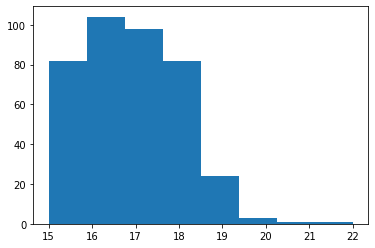

In [7]:
numeric_info('age')

В DF предоставлена информация об учениках в возрасте от 15 до 22 лет включительно. 
Учеников в возрасте 20, 21, 22 очень мало, однако допускаю возможным, что это не "вброс", а ученики не развитых стран, где не всегда дети могут попасть в школу в раннем ворасте. Пропуски отсутсвуют

In [8]:
q_values2_0('address')

U    295
R     83
Name: address, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Преобладают ученики, живущие в городе. У 17 студентов значение города пропущено, это состовляет примерно 4,4% - приемлимо, что бы не исключать переменную из анализа

In [9]:
q_values2_0('famsize')

GT3    261
LE3    107
Name: famsize, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В большенстве семей 4 и более членов семьи. В серии около 7% пропусков, не будем исключать из наблюдений.

In [10]:
q_values2_0('Pstatus')

T    314
A     36
Name: Pstatus, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Почти 90% родителей живут вместе. Пропусков около 11%. Заменим их на None и оставим в DF

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

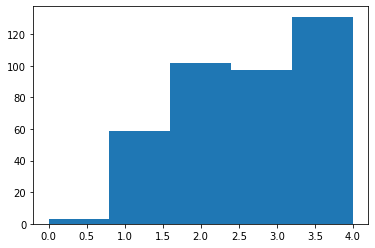

In [11]:
numeric_info('Medu')

Меньше 1% мам не имеют образование, более половины мам имеют образование 11 классов / среднее специальное / высшее. Однако среднее образование всех наблюдений на уровне ниже 8 класса. Незначительное количество пропусков в данных.

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

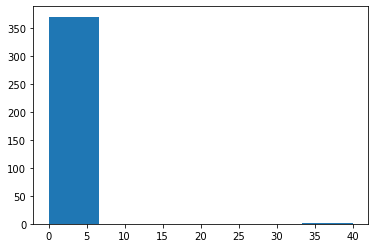

In [12]:
numeric_info('Fedu')

В данных явно присутсвует вброс, избавимся от него. Пропусков приемлимое количество.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].

Избавляемся от выбросов учитывая найденные границы.


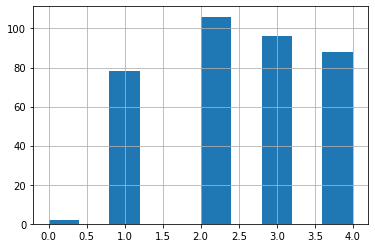

In [13]:
non_relevat_values('Fedu')

Среднее образование отцов ниже, чем мам. Интересно, как у нынешних учеников показатели успеваемости будут коррелировать с этими данными.

In [14]:
q_values2_0('Mjob')

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Около 15% мам безработные.

In [15]:
q_values2_0('Fjob')

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Только 4.5% отцов не работают. Интересно, если родители не работают - влияет ли это на показатели успеваемости, ведь они могут больше времени уделять ребенку.

In [16]:
q_values2_0('reason')

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропуски в норме. Теоретически ученики, кто выбрал школу из за репутации должны быть успешнее остальных.

In [17]:
q_values2_0('guardian')

mother    250
father     86
other      28
Name: guardian, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Пропуски в норме. В основном мамы занимаются детьми, но математика ближе же отцам?

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

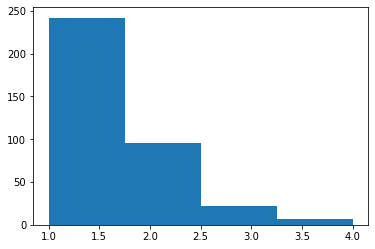

In [18]:
numeric_info('traveltime')

Примерно у каждого 11-го ученика дорога до школы и обратно может занимаь более часа в день.
Возможно кому то долгая прогулка перед школой поможет проснуться, но надо проверить насколько релевантный показатель будет к сравнению с успеваймостью.

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

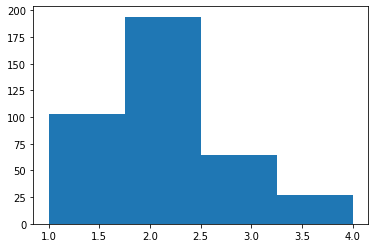

In [19]:
numeric_info('studytime')

75% учеников не уделяют внеурочно учебе более 5ч в неделю. Предпологаю этот показатель будет сильно влиять на успеваемость. Пропусков почти нет.

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

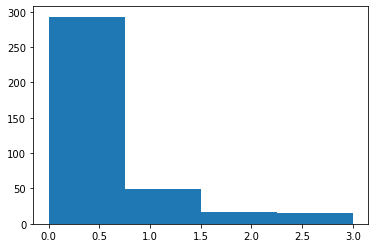

In [20]:
numeric_info('failures')

Предпологаю, что данные не релевантны. Тут сливаются разные категории - школьники с большим кол-вом неудачь и ученики, у кого их нет. Если исключить значения, кроме 1,2,3 - то будет слишком много пропусков, далее исключим серию из анализа.

In [21]:
q_values2_0('schoolsup')

no     335
yes     51
Name: schoolsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Большинство обходится без доп поддержки. Скорее всего ученики, кто к ее имеет - будут более успешными, нежели те, к кому они не обращаются.

In [22]:
q_values2_0('famsup')

yes    219
no     137
Name: famsup, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Так же предположительно важный показатель. Пропусков не мало, но оставим столбец для изучения.

In [23]:
q_values2_0('paid')

no     200
yes    155
Name: paid, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


155 учеников будут иметь больше шансов на хорошие показатели, нежели остальные 200

In [24]:
q_values2_0('activities')

yes    195
no     186
Name: activities, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Больше половины имеют занятия, кроме как по учебе.

In [25]:
q_values2_0('nursery')

yes    300
no      79
Name: nursery, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Возможно показатель не будет сильно коррелировать с успеваемостью в школе. Скорее всего дети, кто не учился в садике - находились дома и обучались с родителями

In [26]:
q_values2_0('higher')

yes    356
no      19
Name: higher, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Большинство хочет получить высшее образование. Предполагаю, что те кто нет - имеют слабые показатели.

In [27]:
q_values2_0('internet')

yes    305
no      56
Name: internet, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Интернет может как помогать, так и мешать детям в контексте учебы

In [28]:
q_values2_0('romantic')

no     240
yes    124
Name: romantic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Мне кажется не релевантным информация по отношению к успеваемости, но посмотрим далее.

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

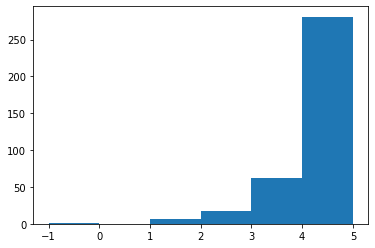

In [29]:
numeric_info('famrel')

Исходя из анализа видно, что мы имеем вброс с занчинием "-1" - избивмся от него.

<AxesSubplot:>

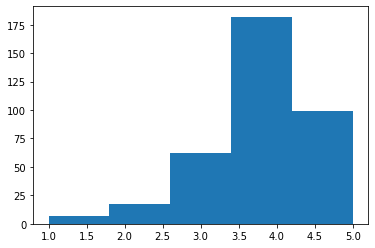

In [30]:
df['famrel'] = df['famrel'].apply(lambda x: None if x < 1 else x)
df['famrel'].hist(bins = 5, grid = False) # Проверим 

Только 6% учеников имеют плохие семейные отношения. Показатель может влиять на успеваемость

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

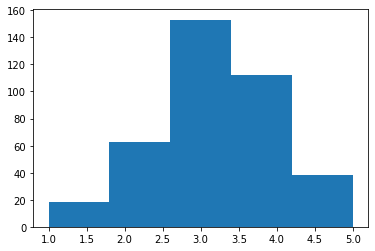

In [31]:
numeric_info('freetime')

Большинство детей успевают отдохнуть после школы.

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

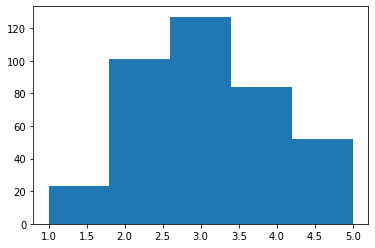

In [32]:
numeric_info('goout')

В основном дети много уделяют время дружбе. Чем больше, тем меньше учебе.

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

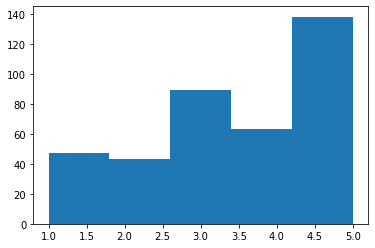

In [33]:
numeric_info('health')

Более 75% учеников имеют удовлетворительное состояние здоровье. 12% имеют плохое состояние - скорее всего это скажется на их успеваемости

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

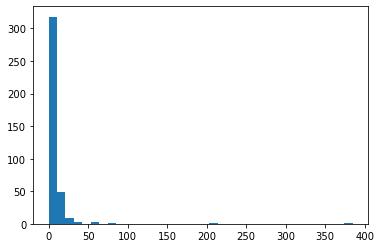

In [34]:
numeric_info('absences')

На этом этапе мы обнаружили потенциальные вбросы. Применим функцию, актулизируем значения.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].

Избавляемся от выбросов учитывая найденные границы.


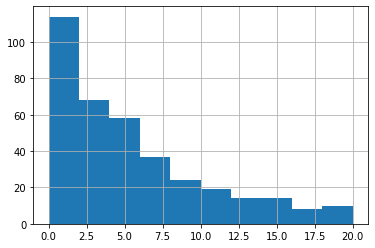

In [35]:
non_relevat_values('absences')

Большинство детей не имеют пропусков или очень маленькое кол-во. Скорее всего длинные прогулы будут уменьшать успеваемость

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

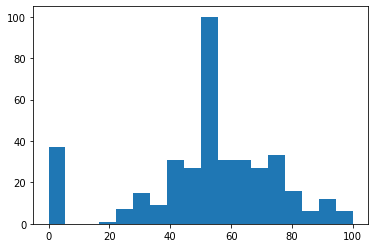

In [36]:
numeric_info('score')

Очень большой показатель учеников, ктоне набрал ни 1 балла. Не плохо было бы выяснить с чем это связано.

# Рассмотрим кореляцию между числовыми переменными

In [37]:
df2 = df.copy() # Создадим копию массива для анализа

In [38]:
df2.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.015556,0.063539,0.029023,0.135107,-0.065946,0.151493,-0.155726
Medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.078589,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
Fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.008603,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,0.102206,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,-1.000000,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.178992,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
"studytime, granular",0.015556,-0.078589,-0.008603,0.102206,-1.000000,0.178992,1.000000,-0.028918,0.121969,0.051280,0.080016,0.078099,-0.115741
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,-0.028918,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.121969,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.051280,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685


In [39]:
    non_actual = {'traveltime' :  -0.070559,
              'famrel' : 0.051219,
              'freetime' : 0.019026,
              'health' : -0.070460,
              }
display('Наименне кореллирующими колонками являются:', non_actual)
non_actual_list = list(non_actual.keys())

'Наименне кореллирующими колонками являются:'

{'traveltime': -0.070559,
 'famrel': 0.051219,
 'freetime': 0.019026,
 'health': -0.07046}

Удалим лишние количественные показатели

In [40]:
# Слабокорилирующие показатели из датафрейма
for x in non_actual_list: 
    df2.drop([x], inplace = True, axis = 1) 

# Столбец, который посчитал нерелевантным при первичной обработке
df2.drop(['failures'], inplace = True, axis = 1) 

# "studytime, granular", он ровнопротивоположен studytime
df2.drop(['studytime, granular'], inplace = True, axis = 1) 

Medu и Fedu имеют высокую кореляцию и схожую логическую нагрузку.
Предлагаю объединить их в переменную 'Pedu', учитывая, что обе переменные почти не имеют пропусков (чуть более 3% в общем количестве).
Заменив None на медианное значение мы практически избежим неточности и насытим наш DF

In [41]:
df2.Medu = df2.Medu.fillna(df.Medu.median()) #Земеняем пропуски
df2.Fedu = df2.Fedu.fillna(df.Fedu.median())

In [42]:
df3 = df2.copy()
df3['Pedu'] = df3['Medu'] + df3['Fedu'] # Сложим показатели 
df3.drop(['Medu'], inplace = True, axis = 1) # Удалим Medu
df3.drop(['Fedu'], inplace = True, axis = 1) # Удалим Fedu

In [43]:
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'studytime', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'absences', 'score', 'Pedu'],
      dtype='object')

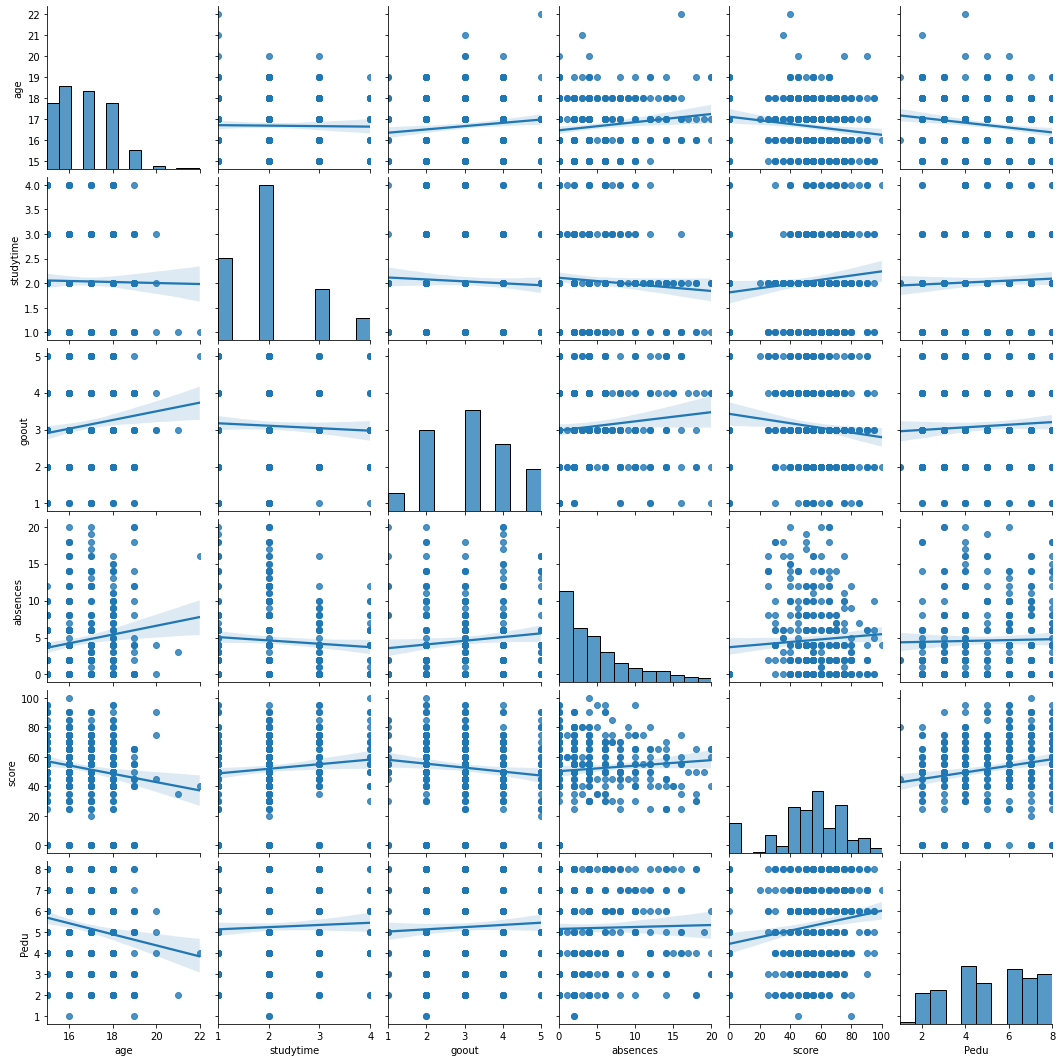

In [44]:
sns.pairplot(df3, kind = 'reg')

In [45]:
# Выведем интересующие нас для дальнейшего анализа количественные переменные
quantitative_variables = ['age', 'studytime', 'goout', 'absences', 'Pedu'] 

# Анализ номинативных переменных

In [46]:
df2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'studytime', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'goout', 'absences', 'score'],
      dtype='object')

In [47]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (5, 5))
    sns.boxplot(x=column, y='score', 
                data=df2,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

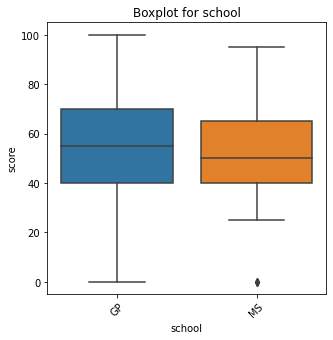

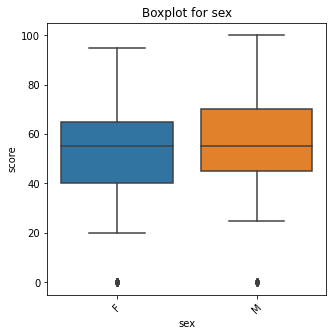

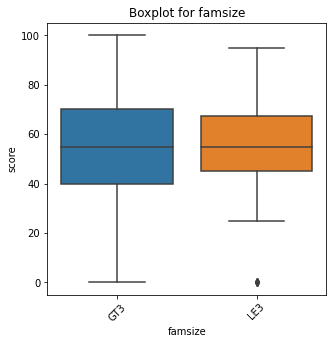

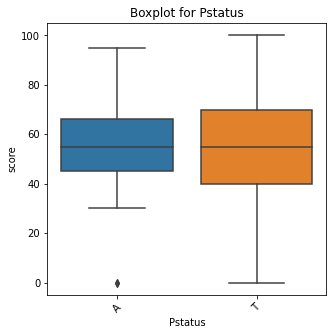

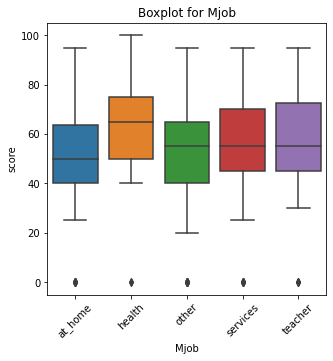

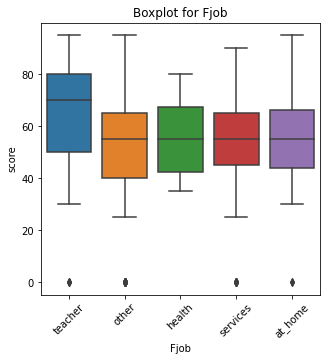

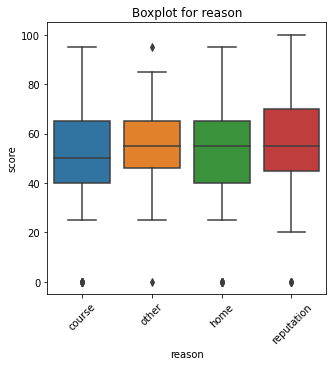

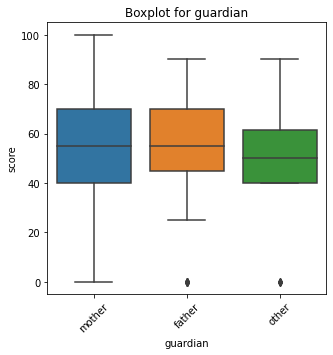

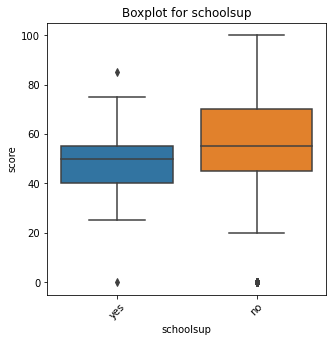

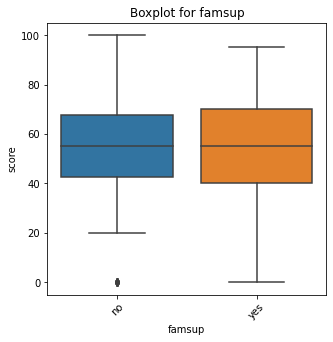

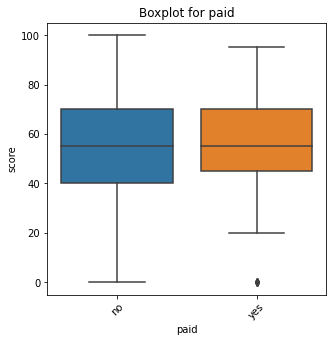

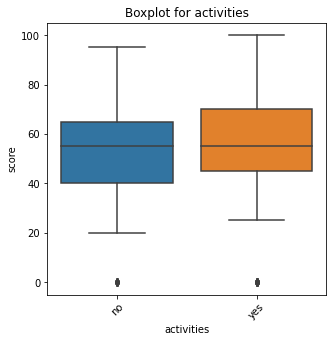

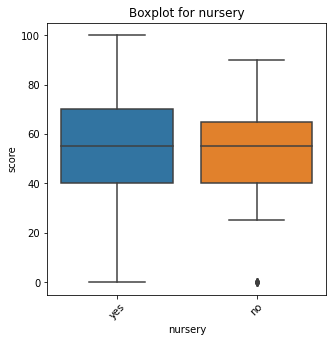

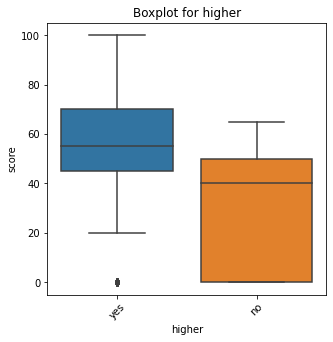

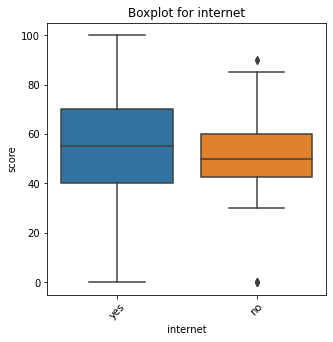

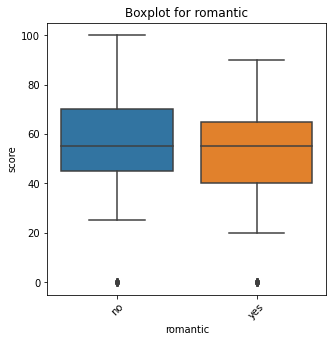

In [48]:
for col in ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [49]:
def get_stat_dif2_0(column):
    cols = df3.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df3.loc[df3.loc[:, column] == comb[0], 'score'], 
                        df3.loc[df2.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)

In [50]:
for col in ['school', 'sex',  'address', 'famsize', 'Pstatus', 'Mjob'
            , 'Fjob', 'paid', 'reason', 'guardian', 'schoolsup', 'higher'
            , 'internet', 'famsup', 'activities', 'nursery', 'romantic']:         
    get_stat_dif2_0(col)

Найдены статистически значимые различия для колонки Mjob


Из номинативных переменных выделим несколько и сохраним их в qualitative_variables

In [51]:
qualitative_variables = ['school', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'higher', 'internet']
all_variables = qualitative_variables + quantitative_variables

# Выводы

В результате EDA для анализа влияния показателей жизни школьников на их успеваемость по математикебыли получены следующие выводы:

В данных достаточно мало пустых значений, не было столбцов, которые мы бы исключили из за малого количеста данных.
Выбросы найдены только в столбцах с Fedu и absences это говорит нам о том, что данные достаточно чистые.

Разобрав кореляцию количественных показателей, можно было получить следующие выводы:
Нас интересовали показатели кореляции переменных с переменной Score.
С возрастом (age) показатели ухудшаются, скорее всего это связано с более тяжелым материалом для освоения.
Наравне с studytime (время учебы) - важным показателем является Pedu (уровень образования родителей). Чем оно выше - тем выше балл у их ребенка. 
Проведения времени с друзьями goout негативно сказывается на рассматриваемом показателе score.
На удивление показатель пропущенных занятий absences не ведет к плохой умпеваемости.

Разобрав кореляцию номинативных переменных можно было прийти к выводу:
Самое важное статистическое наблюдение - успеваемость ученика зависит от профессии матери Mjob, а точнее если мать работает в сфере здравохранения  - шансов на высокие баллы (согласно статистике) выше.
В school школа GP имеет больший успех, в сравнении с MS
В Mjob Хуже всего показатели детей, чья мама - домохозяйка
В Fjob самые высокие показатели у детей, чьи родители работают в сфере обучения.
В reason статистически менее успешные те ученики, кто выбирает школу из за плана обучения.
Согласно guardian если опекуном является родитель - дети более успешные, нежели кто то иной 
schoolsup более успешные ученики те, кому не оказывают дополнительную образовательную поддержку. Скорее всего те, кто в ней не нуждается.
higher дети, кто сремится к высшему образованию - на порядок успешнее других.
Наличие интернета позволяет детям сделать шаг в сторону более высокого балла internet

Хочется выделить показатели paid и nursery - что бы набрать успешный бал, на основе статистики - не обязательно ходить на платные курсы или в детский сад. Однако самый низкий рейтинг у детей с курсами выше, чем у детей без курсов. но так как кореляция сздесь низкая - далее эти показатели рассматривать не будем.
Так же переменные  'sex' 'famsize', 'Pstatus', 'famsup', 'activities', 'romantic' не являются интересными для наблюдения.

Выведем в отдельный датафрэйм самые важные параметры, которые предлагается использовать в дальнейшем для построения модели,

In [52]:
df_for_model = df3.loc[:, all_variables]
df_for_model

,school,Mjob,Fjob,reason,guardian,schoolsup,higher,internet,age,studytime,goout,absences,Pedu
0,GP,at_home,teacher,course,mother,yes,yes,None,18,2.0,4.0,6.0,8.0
1,GP,at_home,other,course,father,no,yes,yes,17,2.0,3.0,4.0,2.0
2,GP,at_home,other,other,mother,yes,yes,yes,15,2.0,2.0,10.0,2.0
3,GP,health,None,home,mother,no,yes,yes,15,3.0,2.0,2.0,6.0
4,GP,other,other,home,father,no,yes,no,16,2.0,2.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,services,services,course,None,no,yes,no,20,2.0,4.0,NaN,4.0
391,MS,services,services,course,mother,no,yes,yes,17,1.0,5.0,3.0,4.0
392,MS,other,other,course,None,None,None,no,21,1.0,3.0,3.0,2.0
393,MS,services,other,course,mother,no,yes,yes,18,1.0,1.0,0.0,5.0
